Building 3 input neuron from scratch

In [1]:
input = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2
output = input[0]*weights[0] + input[1]*weights[1]+ input[2]*weights[2] + bias
print(output)

2.3


Building 4 input neuron from scratch

In [2]:
input = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
output = input[0]*weights[0] + input[1]*weights[1]+ input[2]*weights[2] + input[3]*weights[3] + bias
print(output)

4.8


Multiple neurons

In [3]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
bias = [2, 3, 0.5]
layer_output = []

for neuron_weights, neuron_bias in zip(weights, bias):
    neuron_level_output = 0
    for neuron_input, neuron_weights_2 in zip(inputs, neuron_weights):
        neuron_level_output += neuron_input * neuron_weights_2
    neuron_level_output += neuron_bias
    layer_output.append(neuron_level_output)
print(layer_output)

[4.8, 1.21, 2.385]


Vector and Vector dot multiplication - Neuron coding
Vector and Matrix - Layer of Neuron
Matrix and matrix - Batch

In [6]:
import numpy as np
import pandas as pd

input = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
input_array = np.array(input)
weights_array = np.array(weights)
neuron = np.dot(input_array, weights_array) + bias

print (neuron)

4.8


Layer of neurons using numpy || Vector and Matrix

inputs_array -> 4x1       ||       weights_array -> 3×4       ||       output_array & biases -> 3×1

In [3]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)

output_array = np.dot(weights_array, inputs_array) + biases_array
print (output_array)

[4.8   1.21  2.385]


Batch of data -> 4 inputs for 1st batch, next 4 for second batch, etc.

Input Matrix -> 3x4 

Weight Matrix -> 3x4 

Output Matrix -> 3x4

Also, transpose will have to be used for weights as for multiplication purposes.

In [4]:
inputs = [[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)

batch_output = np.dot(inputs_array, np.transpose(weights_array)) + biases_array
print(batch_output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# Layers

Up until now, we were only working with a single layer of neurons (3 in the above case), but the real power lies in stacking of neuronal layers. 

There is an input layer with 4 inputs, then 2 hidden layers with 3 neurons, and output from the 2nd hidden layer.

First we will have to calculate output from the 1st layer which will be generated from a 3x4 matrix of input and 3x4 matrix of weights for 1st hidden layer of neurons.

But then the 2nd layer will have 3x3 matrix for weights, since input for that layer will be provided by the 3 neurons in the 1st layer. And so there will be 3 weights for every neuron in 2nd layer.

# Further explanation

Output_1 (From 1st layer) -> np.dot(X, W1) + bias_1

Output_2 -> np.dot(Output_1, W2) + bias_2

.

.

.

Output_50 -> np.dot(Output_49, W50) + bias_50

This is called Forward Pass since we are moving along the layers in the Neural Network.

In [9]:
inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

inputs_array = np.array(inputs)
weights_array = np.array(weights)
weights2_array = np.array(weights2)
biases_array = np.array(biases)
biases2_array = np.array(biases2)

# Layer 1 output

neuron_layer_1 = np.dot(inputs_array, weights_array.T) + biases_array

# Layer 2 output

neuron_layer_2 = np.dot(neuron_layer_1, weights2_array.T) + biases2_array

print(neuron_layer_2)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


# Dense Layer Class

We build these powerful neural networks to work with non-linear data and identify trends.

=> Spiral Data

<function matplotlib.pyplot.show(close=None, block=None)>

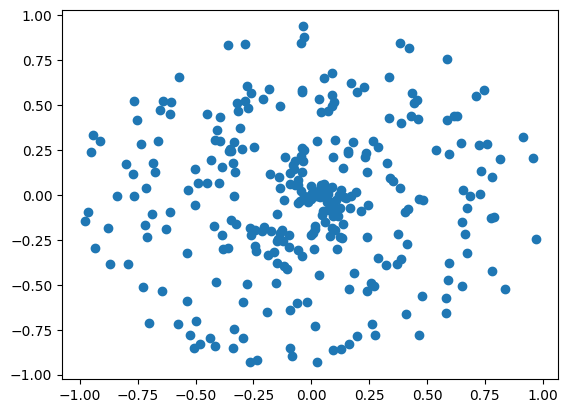

In [2]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import nnfs
nnfs.init()
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1])
plt.show